<a href="https://colab.research.google.com/github/pligy/connect4/blob/master/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практическое задание 2. Визуализация данных в Python. Seaborn и Plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

file_path = '/content/sample_data/winequality-white.csv'
df = pd.read_csv(file_path, delimiter=';')
print(df.head)

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

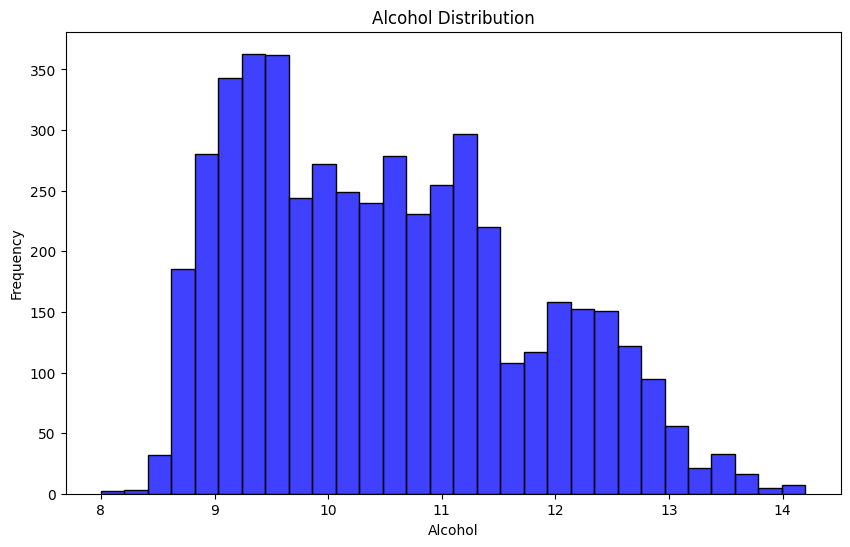

In [ ]:
# 1. Histogram
# Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['alcohol'], bins=30, kde=False, color='blue')
plt.title('Alcohol Distribution')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

# Plotly
fig = px.histogram(df, x='alcohol', nbins=30, title='Alcohol Distribution')
fig.show()

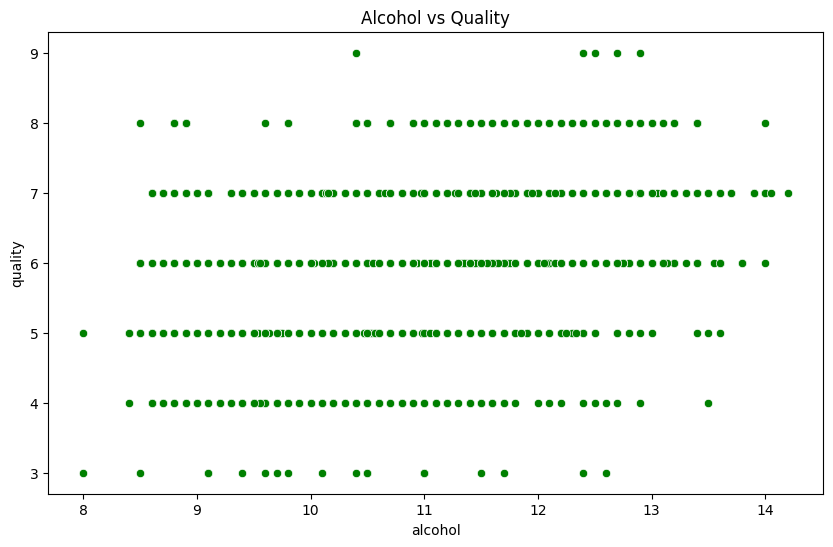

In [ ]:
# 2. Scatter
# Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alcohol', y='quality', color='green')
plt.title('Alcohol vs Quality')
plt.show()

# Plotly
fig = px.scatter(df, x='alcohol', y='quality', title='Alcohol vs Quality', color_discrete_sequence=['green'])
fig.show()

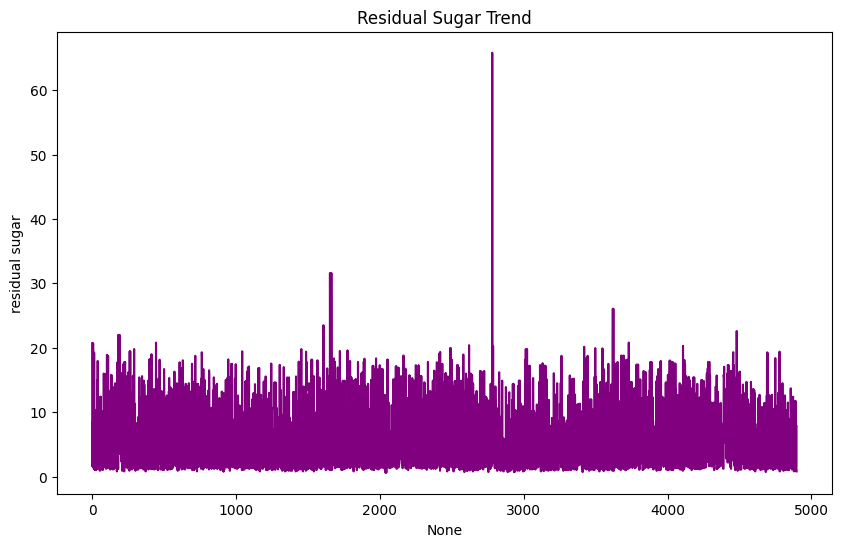

In [ ]:
# 3. Line
# Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='residual sugar', x=df.index, color='purple')
plt.title('Residual Sugar Trend')
plt.show()

# Plotly
fig = px.line(df, y='residual sugar', title='Residual Sugar Trend')
fig.show()

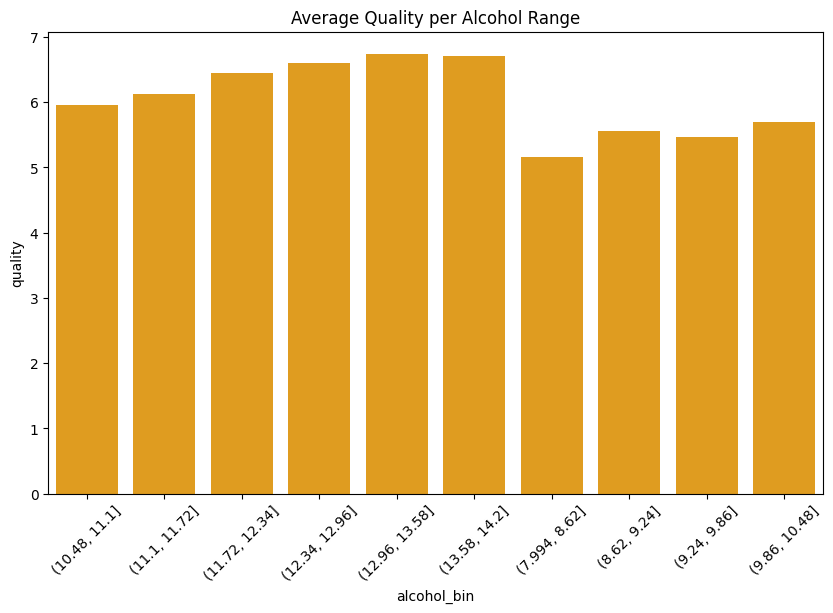

In [ ]:
# 4. Bar
# Seaborn
df['alcohol_bin'] = pd.cut(df['alcohol'], bins=10).astype(str)
quality_by_alcohol = df.groupby('alcohol_bin')['quality'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='alcohol_bin', y='quality', data=quality_by_alcohol, color='orange')
plt.title('Average Quality per Alcohol Range')
plt.xticks(rotation=45)
plt.show()

# Plotly
fig = px.bar(quality_by_alcohol, x='alcohol_bin', y='quality', title='Average Quality per Alcohol Range')
fig.show()

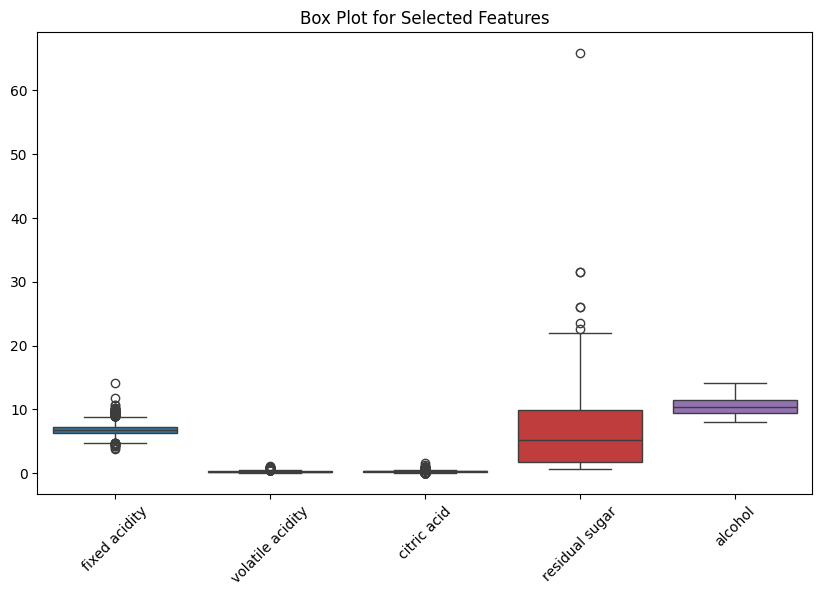

In [ ]:
# 5. Box
# Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol']])
plt.title('Box Plot for Selected Features')
plt.xticks(rotation=45)
plt.show()

# Plotly
fig = px.box(df, y=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol'], title='Box Plot for Selected Features')
fig.show()

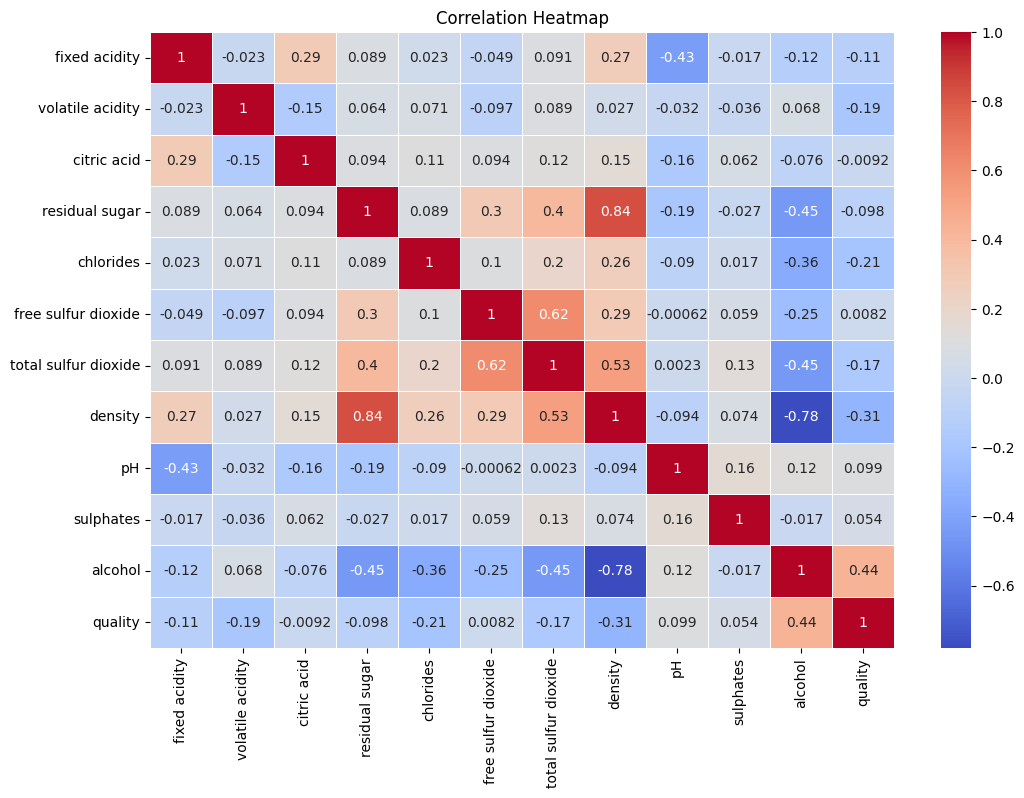

In [ ]:
# 6. Heatmap
# Seaborn
numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

import plotly.figure_factory as ff
# Plotly
numeric_df = df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr().values
columns = numeric_df.columns.tolist()
fig = ff.create_annotated_heatmap(z=corr_matrix, x=columns, y=columns, colorscale='Viridis')
fig.update_layout(title='Correlation Matrix Heatmap')
fig.show()

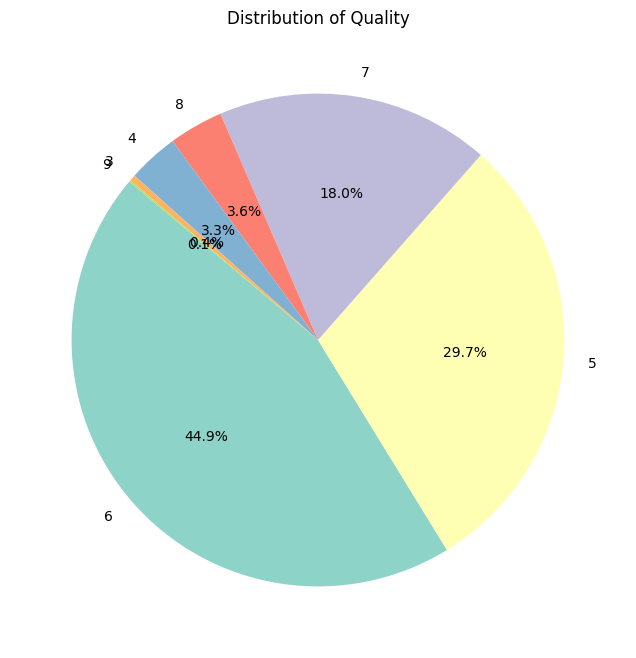

In [ ]:
# 7. Pie
# Seaborn
quality_counts = df['quality'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Quality')
plt.show()

# Plotly
fig = px.pie(df, names='quality', title='Distribution of Quality')
fig.show()

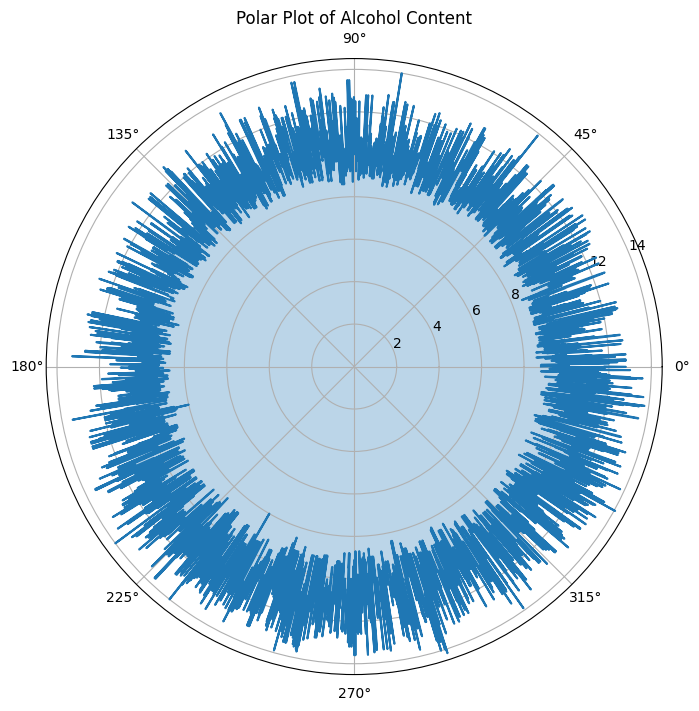

In [ ]:
# 8. Polar
import numpy as np
# Seaborn
plt.figure(figsize=(8, 8))
angles = np.linspace(0, 2 * np.pi, len(df['alcohol']))
values = df['alcohol']
ax = plt.subplot(111, polar=True)
ax.plot(angles, values)
ax.fill(angles, values, alpha=0.3)
plt.title('Polar Plot of Alcohol Content')
plt.show()

# Plotly
df['angles'] = np.linspace(0, 2 * np.pi, len(df['alcohol']))
fig = px.line_polar(df, r='alcohol', theta='angles', title='Polar Plot of Alcohol Content')
fig.show()

In [ ]:
# 9. 3D
# Plotly
fig = px.scatter_3d(df, x='alcohol', y='quality', z='residual sugar', color='quality', title='3D Scatter Plot: Alcohol vs Quality vs Residual Sugar')
fig.show()